## Installing and importing necessary libraries

In [ ]:
# !pip install pandas numpy matplotlib seaborn kagglehub

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [152]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Checking and handling the missing values

In [136]:
print(df.isna().sum())
print(df.describe())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.0000

In [137]:
# if it is numerical the go for mean else go for mode
print(df['bmi'].mean())
print(df['smoking_status'].mode()[0])

28.893236911794666
never smoked


In [143]:
# here we found most of the data of bmi is Nan
df['bmi'] = df['bmi'].fillna(df['bmi'].mean()).astype(float)

In [51]:
# df is updated and all values are true
print(df.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [65]:
# we can check also the no of time each value appeared
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

## Data Visualizations

### Scatter Plot

### **How Scatter Plots Work**
A **scatter plot** is used to visualize the relationship between two numerical variables. Each point represents an observation, plotted based on its values for those two variables.

**Key Uses:**
- Identifying correlations (positive, negative, or no correlation).
- Detecting clusters, trends, or outliers.
- Exploring relationships between variables.

---

### **Best Data for Scatter Plots**
Since scatter plots work with **numerical data**, you should select two **continuous (numeric) variables** from your dataset. 

#### **Good Choices from Your Healthcare Dataset**
- `age` vs. `bmi` (To see how BMI changes with age)
- `avg_glucose_level` vs. `bmi` (To check if glucose level is related to BMI)
- `age` vs. `avg_glucose_level` (To examine glucose levels across ages)

---

### **Plotting a Scatter Plot in Python**
You can use **Matplotlib** or **Seaborn** to create scatter plots.

#### **Example 1: Age vs. BMI**
```python
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'age': [67, 61, 80, 49, 79],
    'bmi': [36.6, None, 32.5, 34.4, 24.0]  # Contains NaN
}

df = pd.DataFrame(data)

# Handle missing values (fill with mean)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['age'], df['bmi'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs. BMI')
plt.show()


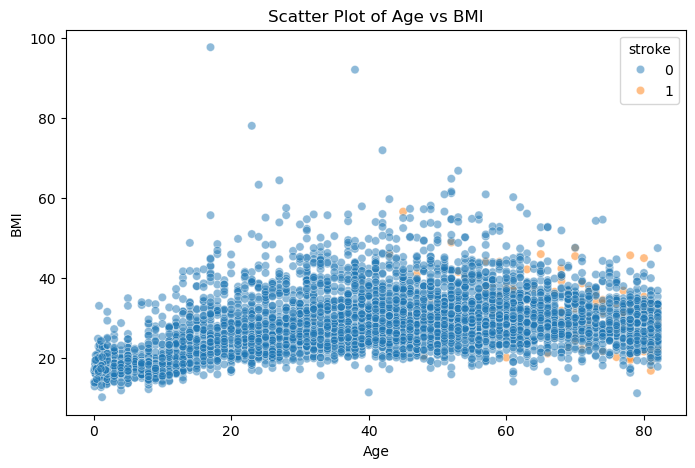

In [71]:
plt.figure(figsize=(8,5))
# plt.scatter(df['age'], df['bmi'], color='blue', alpha=0.5)
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs BMI')
plt.show()

### Horizontal Bar Chart

In [89]:
# Need to know what data would be best suitable
print(df['gender'].value_counts())
df.groupby('smoking_status')['bmi'].mean()
df.groupby('work_type')['avg_glucose_level'].mean()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


work_type
Govt_job         107.779772
Never_worked      96.042727
Private          106.796844
Self-employed    112.645446
children          94.400277
Name: avg_glucose_level, dtype: float64

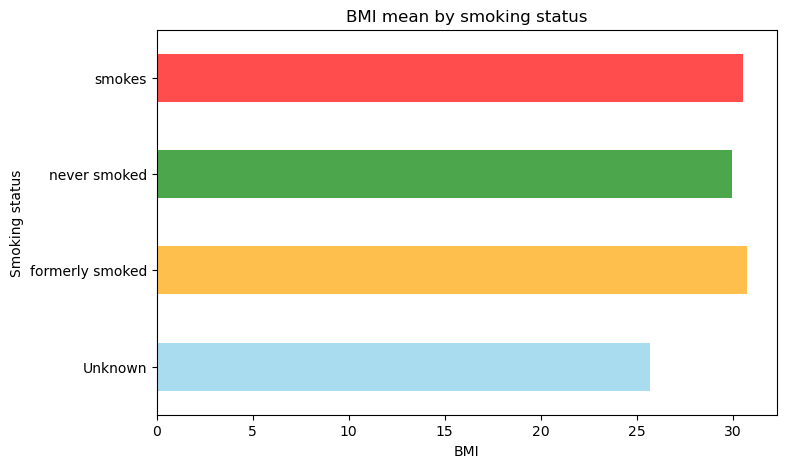

In [86]:
# BMI mean by smoking status
smoking_bmi = df.groupby('smoking_status')['bmi'].mean()
plt.figure(figsize=(8,5))
smoking_bmi.plot(kind='barh', color=['skyblue','orange','green','red'], alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Smoking status')
plt.title("BMI mean by smoking status")
plt.show()

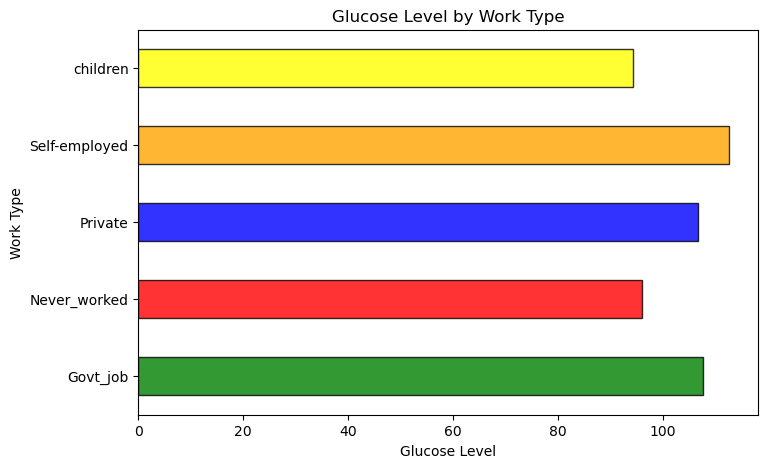

In [100]:
work_glucose = df.groupby('work_type')['avg_glucose_level'].mean()
plt.figure(figsize=(8,5))
work_glucose.plot(kind='barh', color=['green','red','blue','orange','yellow'], alpha=0.8, edgecolor='black')
plt.xlabel('Glucose Level')
plt.ylabel('Work Type')
plt.title('Glucose Level by Work Type')
plt.show()

### **How Histogram Bar Charts Work**
A **histogram** is used to visualize the **distribution of a numerical variable**. It groups data into **bins (intervals)** and counts how many data points fall into each bin. Unlike bar charts, which are used for **categorical data**, histograms are used for **continuous numerical data**.

---

### **Best Data for Histograms**
Since histograms work with **numerical data**, you should choose **continuous variables** from your dataset.

#### **Good Choices from Your Healthcare Dataset:**
1. **Age Distribution** – To see how ages are distributed in the dataset.
2. **BMI Distribution** – To check if most people have normal, underweight, or overweight BMI values.
3. **Glucose Level Distribution** – To understand how glucose levels vary across patients.

---

### **Example 1: Age Distribution Histogram**
```python
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'age': [67, 61, 80, 49, 79]
}

df = pd.DataFrame(data)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(df['age'], bins=5, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()
```

### **Key Takeaways**
✔ **Use histograms for numerical data** (age, BMI, glucose levels).  
✔ **Bins determine how data is grouped** (too few bins may hide patterns, too many may add noise).  
✔ **Histograms show the shape of data** (normal distribution, skewness, outliers).  
✔ **Handling missing values (like BMI) is important** before plottin.  


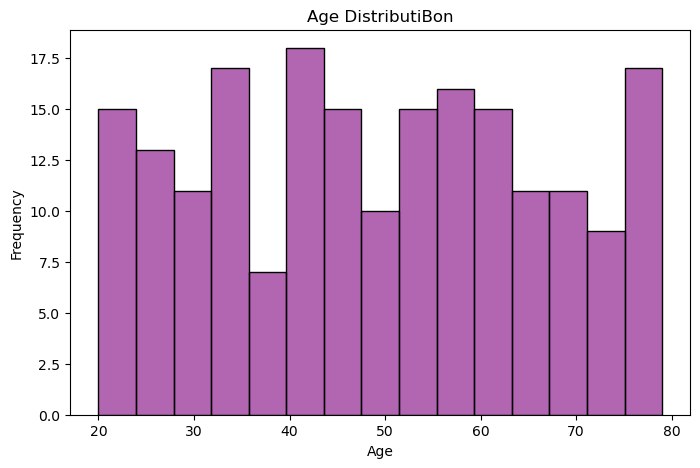

In [116]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=False, color='purple', alpha=0.6, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age DistributiBon')
plt.show()

[15 13 11 17  7 18 15 10 15 16 15 11 11  9 17] [20.         23.93333333 27.86666667 31.8        35.73333333 39.66666667
 43.6        47.53333333 51.46666667 55.4        59.33333333 63.26666667
 67.2        71.13333333 75.06666667 79.        ]


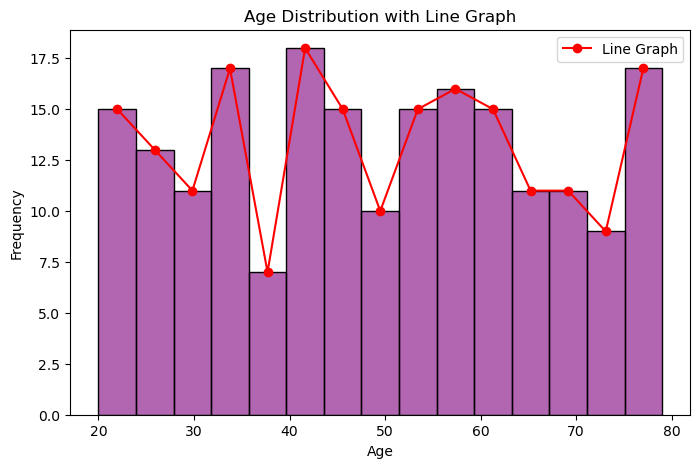

In [117]:
# Create histogram
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['age'], bins=15, kde=False, color='purple', alpha=0.6, edgecolor='black')

# Extract histogram data
counts, bin_edges = np.histogram(df['age'], bins=15)
print(counts, bin_edges)

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot line graph over histogram
plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label="Line Graph")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution with Line Graph")
plt.legend()
plt.show()


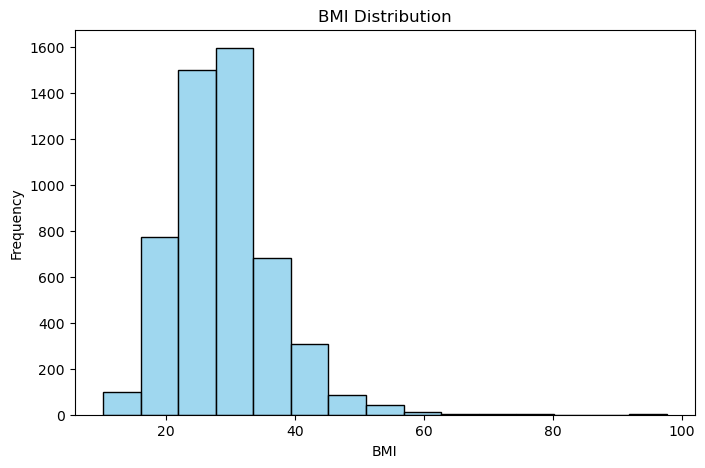

In [159]:
# BMI distribution
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], bins=15, color='skyblue', alpha=0.8, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

### Line Graph

Text(0.5, 1.0, 'BMi over Age')

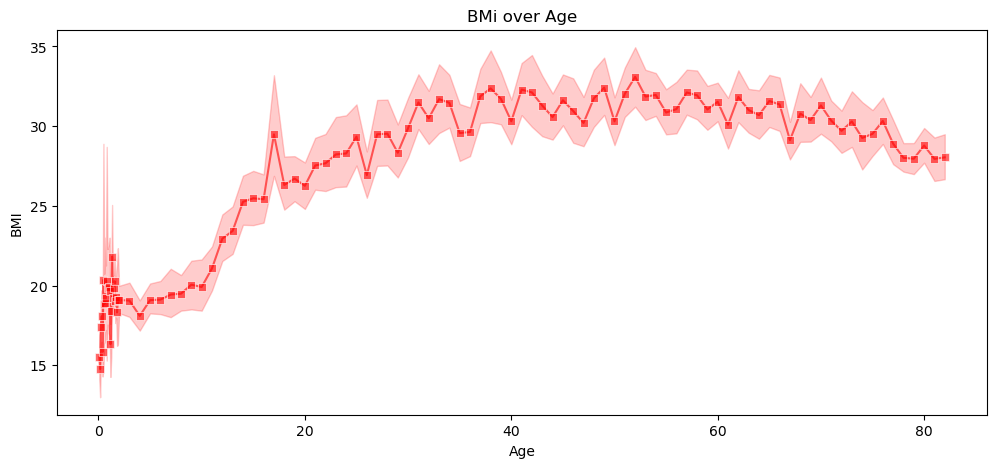

In [175]:
# BMI over Age
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x='age', y='bmi', marker='s', color='red', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMi over Age')

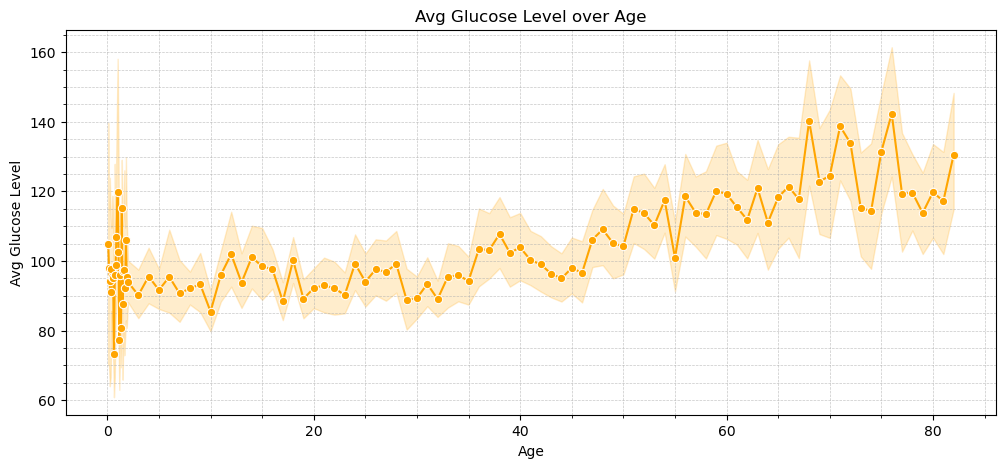

In [181]:
# Avg Glucode Level over Age
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='age', y='avg_glucose_level', marker='o', color='orange')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.xlabel('Age')
plt.ylabel('Avg Glucose Level')
plt.title('Avg Glucose Level over Age')
plt.show()